### ML- 8 lec was kaggle kernel

In [72]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import pydotplus
from sklearn.externals.six import StringIO

In [39]:
hr = pd.read_csv('HR Analytics.csv')

hr_dummies = pd.get_dummies(hr)
error_rates = []

for i in np.random.randint(1, 30, 100):
    train, test = train_test_split(hr_dummies,
                                  test_size = 0.3,
                                  random_state = i)

    train_x = train.drop('Attrition', axis=1)
    test_x = test.drop('Attrition', axis=1)

    train_y = train['Attrition']
    test_y = test['Attrition']

    model = DecisionTreeClassifier(max_depth=4)
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    error_rate = (test_pred != test_y).sum() / test_y.shape[0] * 100
    error_rates.append(error_rate)

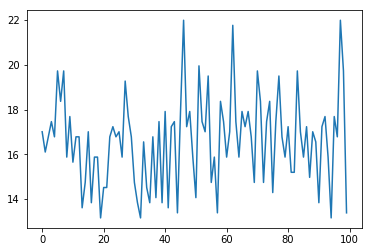

In [40]:
import matplotlib.pyplot as plt

plt.plot(error_rates)

In [25]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    from sklearn import tree

    import os
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ['PATH'] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

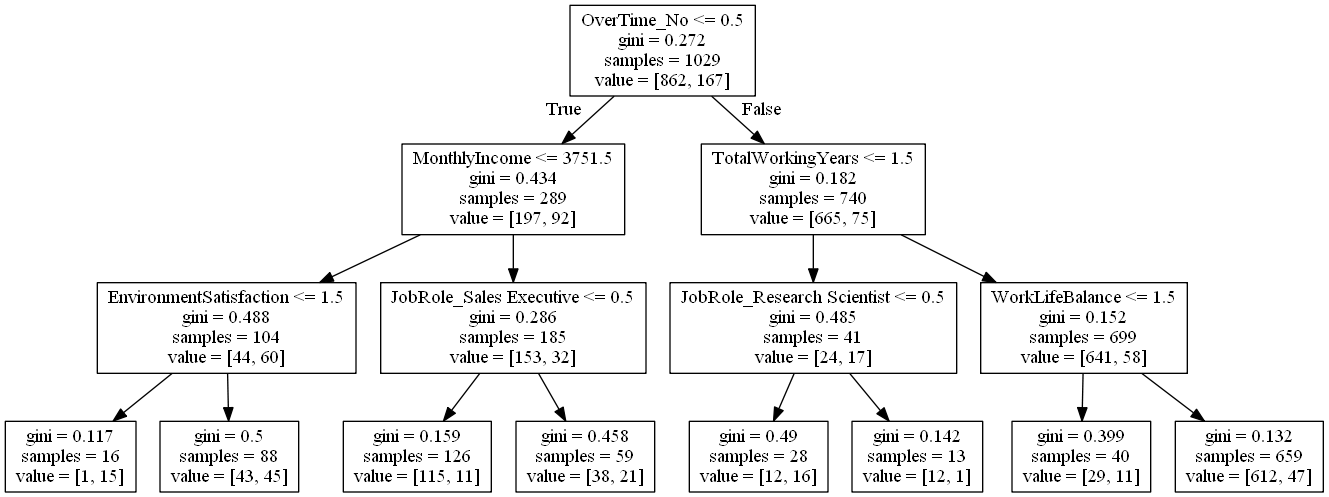

In [26]:
draw_tree(model, train_x.columns)

# Training vs Testing error

In [61]:
train, test = train_test_split(hr_dummies,
                               test_size = 0.3,
                               random_state = 100)

train_x = train.drop('Attrition', axis=1)
test_x = test.drop('Attrition', axis=1)
train_y = train['Attrition']
test_y = test['Attrition']

depth = []
train_errors = []
test_errors = []

for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(train_x, train_y)
    
    train_pred = model.predict(train_x)
    train_error = (train_pred != train_y).sum() / train_y.shape[0] * 100
    
    test_pred = model.predict(test_x)
    test_error = (test_pred != test_y).sum() / test_y.shape[0] * 100
    
    depth.append(i)
    train_errors.append(train_error)
    test_errors.append(test_error)


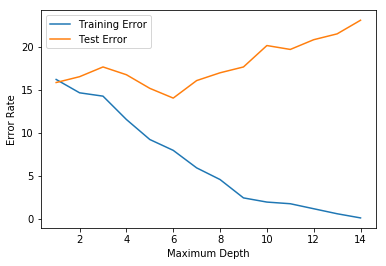

In [62]:
plt.plot(depth, train_errors)
plt.plot(depth, test_errors)
plt.ylabel('Error Rate')
plt.xlabel('Maximum Depth')
plt.legend(['Training Error', 'Test Error'])

# Hyperparameter Tuning

In [65]:

from sklearn.model_selection import GridSearchCV
# cv stands for cross validation. 

### the grid search CV function tells us what is the ideal values of the hyperparameters which should be best for model to perform at its best. For example in below model, we have put DT as the model and we are checking it for our HR train and test data. Its output will be the ideal values of split and depth which we should use in the model

In [69]:
dt_model = DecisionTreeClassifier()
params = {'max_depth' : list(range(1, 11)),
         'criterion' : ['gini', 'entropy'],
         'min_samples_split' : [13,5,6,10,20,12]}

tree_cv = GridSearchCV(dt_model, param_grid=params)
tree_cv.fit(train_x, train_y)
tree_cv.best_params_


{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 13}